<a href="https://colab.research.google.com/github/jberkow713/DS-Unit-2-Applied-Modeling/blob/master/2008PositionPlayerProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np


import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*

In [0]:
import category_encoders as ce

In [0]:
df = pd.read_csv('/content/MLB2008.csv')

In [166]:
df.head(12)


,PLAYER,Record_ID#,SALARY,ROOKIE,POS,G,PA,AB,H,1B,2B,3B,HR,TB,BB,UBB,IBB,HBP,SF,SH,ROE,RBI,LEADOFF_PA,DP,TP,WP,PB,END_GAME,SO,BK,INTERFERENCE,FC,TOB,OUT,SIT_DP,GIDP,PITCHES,BALLS,STRIKES,FB,GB,LD,POP,Batted Balls,PA_P,PA_C,PA_1B,PA_2B,PA_3B,PA_SS,PA_LF,PA_CF,PA_RF,PA_DH,PA_PH,PA_PR,G_P,G_C,G_1B,G_2B,G_3B,G_SS,G_LF,G_CF,G_RF,G_DH,G_PH,G_PR,AVG,OBP,SLG,D_ISO,TBP,BBr,UBBr,IBBR,SO/BB,ABR,HITR,B1R,B2R,B3R,HRr,HBPR,SFR,SHR,ROEr,SOr,OUTR,NSOR,RBIR,LEADOFFR,END_GAMER,DP%,FB%,GB%,LD%,POP%,SB,CS,PICKOFF,R,SB%,RUNR,D_BPF,PA%,D_MLVr,D_PMLVr,D_RPMLVr,D_VORPr,D_MLV,D_PMLV,D_RPMLV,D_VORP,D_NETDP,D_EqA,D_EqR,D_RAR,D_RAP,D_RARP,D_OUTS_EQ,PA_ROB,R1,R2,R3,R1_BI,R2_BI,R3_BI,ROB,OBI,R1BI%,R2BI%,R3BI%,OBI%,A-Rod_Factor,Score_Impact_Ratio,On_Base_%,On_Base_Presence,Long_Ball_Ratio,Xtra_Base_Ratio,Fan_Favorite_Ratio,Team-Contribution,Team-Contribution-Real,Overall_Impact,Overall_Impact_Ratio,Team_Impact_Ratio
0,Gregg Zaun,1,3750000,0,2,85,288,245,58,40,12,0,6,88,38,37,1,1,1,3,4,30,63,7,0,1,2,7,38,0,0,0,97,187,51,6,1154,462,692,55,94,34,28,211,0,273,0,0,0,0,0,0,0,8,7,0,0,79,0,0,0,0,0,0,0,3,7,0,0.237,0.340,0.359,0.122,0.30556,0.1319,0.1285,0.00347,1.00,0.85069,0.20139,0.13889,0.04167,0.00000,0.0208,0.00347,0.00347,0.01042,0.0139,0.1319,0.64931,0.51736,0.10417,0.21875,0.02431,11.8,26.1,44.6,16.1,13.3,2,1,0,29,66.7,0.10069,99.7129,4.7,-0.080,-0.026,0.05891,0.059,-5.4,-1.7,3.99528,4.0,0.47,0.256,31.7,7.3,1.5,10.2,192,134,89,75,39,2,9,13,203,24,2.2,12.0,33.3,11.8,786,0.104167,0.336806,0.298969,0.103448,0.310345,0.097917,114.374612,0.118664,82.684092,0.558481,0.347222
1,Henry Blanco,2,3175000,0,2,54,128,120,35,29,3,0,3,47,6,5,1,0,0,2,0,12,27,4,0,0,0,4,22,0,0,0,41,87,33,4,447,149,298,33,43,17,8,101,0,109,1,0,0,0,0,0,0,0,18,0,0,45,1,0,0,0,0,0,0,0,18,0,0.292,0.325,0.392,0.100,0.36719,0.0469,0.0391,0.00781,3.67,0.93750,0.27344,0.22656,0.02344,0.00000,0.0234,0.00000,0.00000,0.01562,0.0000,0.1719,0.67969,0.50781,0.09375,0.21094,0.03125,12.1,32.7,42.6,16.8,7.9,0,0,0,15,0.0,0.11719,100.7640,2.0,-0.031,0.033,0.10619,0.106,-0.9,1.0,3.08509,3.1,0.42,0.247,13.2,2.2,-1.1,2.8,87,73,52,37,18,1,2,6,107,9,1.9,5.4,33.3,8.4,338,0.093750,0.320312,0.365854,0.085714,0.171429,0.046875,22.860048,0.023717,41.385037,0.279531,0.257812
2,Moises Alou,7,7500000,0,7,15,54,49,17,15,2,0,0,19,2,2,0,2,1,0,2,9,12,1,0,0,0,0,4,0,0,0,21,31,12,1,152,58,94,11,20,11,4,46,0,0,0,0,0,0,49,0,0,4,1,0,0,0,0,0,0,0,13,0,0,1,1,0,0.347,0.389,0.388,0.041,0.35185,0.0370,0.0370,0.00000,2.00,0.90741,0.31481,0.27778,0.03704,0.00000,0.0000,0.03704,0.01852,0.00000,0.0370,0.0741,0.57407,0.50000,0.16667,0.22222,0.00000,8.3,23.9,43.5,23.9,8.7,1,1,1,4,50.0,0.07407,98.7685,0.8,0.131,0.079,0.20218,0.178,1.6,1.0,2.49187,2.2,-0.30,0.285,7.4,3.1,0.8,2.4,34,24,16,10,7,0,4,5,33,9,0.0,40.0,71.4,27.3,144,0.166667,0.388889,0.190476,0.000000,0.117647,0.000000,7.095112,0.007361,19.685500,0.132964,0.277778
3,Corey Patterson,9,3000000,0,8,123,392,366,75,46,17,2,10,126,16,16,0,1,4,5,7,34,120,5,0,2,1,8,57,0,0,3,92,290,74,3,1299,414,885,85,160,43,30,318,0,0,0,0,0,0,0,370,0,0,22,0,0,0,0,0,0,0,0,124,0,0,22,5,0.205,0.238,0.344,0.139,0.32143,0.0408,0.0408,0.00000,3.56,0.93367,0.19133,0.11735,0.04337,0.00510,0.0255,0.00255,0.01020,0.01276,0.0179,0.1454,0.73980,0.59439,0.08673,0.30612,0.02041,4.1,26.7,50.3,13.5,9.4,14,9,3,46,60.9,0.11735,100.4130,6.3,-0.308,-0.309,-0.19511,-0.208,-28.4,-28.6,-18.02090,-19.2,-5.02,0.205,29.3,-9.9,-26.2,-12.1,309,153,114,67,37,3,6,15,218,24,2.6,9.0,40.5,11.0,970,0.086735,0.234694,0.500000,0.133333,0.386667,0.160714,111.836225,0.116031,112.070429,0.756968,0.362245
4,Rod Barajas,10,700000,0,2,100,377,349,87,53,23,0,11,143,17,17,0,7,4,0,2,49,70,10,0,3,2,2,61,1,0,0,111,264,82,9,1458,465,993,101,109,47,35,292,0,356,14,0,0,0,0,0,0,5,2,0,0,98,4,0,0,0,0,0,0,2,2,0,0.249,0.294,0.410,0.160,0.37931,0.0451,0.0451,0.00000,3.59,0.92573,0.23077,0.14058,0.06101,0.00000,0.0292,0.01857,0.01061,0.00000,0.0053,0.1618,0.70027,0.53846,0.12997,0.18568,0.00531,11.0,34.6,37.3,16.1,12.0,0,0,0,44,0.0,0.11671,99.8509,6.1,-0.085,-0.037,0.0

In [0]:
df1 = df.copy()

In [0]:
# Continue to clean and explore your data.
#For the evaluation metric you chose, what score would you get just by guessing?
#Can you make a fast, first model that beats guessing?

In [0]:
#mean abs error of salaries versus average salaries to find baseline error

In [9]:
guess = df1['SALARY'].mean()
guess


4349423.148367953

In [0]:
errors = guess - df1['SALARY']

In [11]:
Baseline_MAE = errors.abs().mean()

print(f'If we just guessed every salary for ${guess:,.0f},')
print(f'we would be off by ${Baseline_MAE:,.0f} on average.')

If we just guessed every salary for $4,349,423,
we would be off by $3,802,791 on average.


In [0]:
#Big Spread


In [12]:
print('HUGE RANGE!!')
print(df1['SALARY'].max())
df1['SALARY'].min()
#League Minimum was 390,000 at the time

HUGE RANGE!!
28000000


400000

In [0]:
df['A-Rod_Factor'] = df['PA'] + 3*df['RBI'] + 5*df['HR'] + 3*df['TB'] + 3*df['BB']

In [0]:
df['Score_Impact_Ratio'] = df['RBI'] / df['PA']
df['On_Base_%'] = df['TOB'] / df['PA']
df['On_Base_Presence'] = df['R'] / df['TOB']
df['Long_Ball_Ratio'] = df['HR'] / df['H']
df['Xtra_Base_Ratio'] = (df['2B']+df['3B']+df['HR'])/ df['H']
df['Fan_Favorite_Ratio'] = (df['HR']/df['PA']) * df['PA%']
# New performance feature
df['Team-Contribution']=  2*df['RBIR'] * 4*df['RBI'] * 2*df['RUNR'] * 3*df['R'] * df['OBP'] * 3*df['D_EqA'] 
df['Team-Contribution-Real'] =  df['Team-Contribution'] / df['Team-Contribution'].mean()
df['Overall_Impact'] = .3*df['D_EqA'] + .7*(df['TB']+df['RBI']+df['SH']/df['PA'])
df['Overall_Impact_Ratio']= df['Overall_Impact'] / df['Overall_Impact'].mean()

In [0]:
df['Team_Impact_Ratio'] = (df['1B']+ 2*df['2B'] + 3*df['3B'] + 
                               6*df['HR'] + df['BB'] + 2*df['SH'] 
                               - 2*df['GIDP'] - df['SO'] + 3*df['SB']
                               -3*df['PICKOFF']) / df['PA']


In [16]:
df.head()

,PLAYER,Record_ID#,SALARY,ROOKIE,POS,G,PA,AB,H,1B,2B,3B,HR,TB,BB,UBB,IBB,HBP,SF,SH,ROE,RBI,LEADOFF_PA,DP,TP,WP,PB,END_GAME,SO,BK,INTERFERENCE,FC,TOB,OUT,SIT_DP,GIDP,PITCHES,BALLS,STRIKES,FB,...,D_MLVr,D_PMLVr,D_RPMLVr,D_VORPr,D_MLV,D_PMLV,D_RPMLV,D_VORP,D_NETDP,D_EqA,D_EqR,D_RAR,D_RAP,D_RARP,D_OUTS_EQ,PA_ROB,R1,R2,R3,R1_BI,R2_BI,R3_BI,ROB,OBI,R1BI%,R2BI%,R3BI%,OBI%,A-Rod_Factor,Score_Impact_Ratio,On_Base_%,On_Base_Presence,Long_Ball_Ratio,Xtra_Base_Ratio,Fan_Favorite_Ratio,Team-Contribution,Team-Contribution-Real,Overall_Impact,Overall_Impact_Ratio,Team_Impact_Ratio
0,Gregg Zaun,1,3750000,0,2,85,288,245,58,40,12,0,6,88,38,37,1,1,1,3,4,30,63,7,0,1,2,7,38,0,0,0,97,187,51,6,1154,462,692,55,...,-0.080,-0.026,0.05891,0.059,-5.4,-1.7,3.99528,4.0,0.47,0.256,31.7,7.3,1.5,10.2,192,134,89,75,39,2,9,13,203,24,2.2,12.0,33.3,11.8,786,0.104167,0.336806,0.298969,0.103448,0.310345,0.097917,114.374612,0.118664,82.684092,0.558481,0.347222
1,Henry Blanco,2,3175000,0,2,54,128,120,35,29,3,0,3,47,6,5,1,0,0,2,0,12,27,4,0,0,0,4,22,0,0,0,41,87,33,4,447,149,298,33,...,-0.031,0.033,0.10619,0.106,-0.9,1.0,3.08509,3.1,0.42,0.247,13.2,2.2,-1.1,2.8,87,73,52,37,18,1,2,6,107,9,1.9,5.4,33.3,8.4,338,0.093750,0.320312,0.365854,0.085714,0.171429,0.046875,22.860048,0.023717,41.385037,0.279531,0.257812
2,Moises Alou,7,7500000,0,7,15,54,49,17,15,2,0,0,19,2,2,0,2,1,0,2,9,12,1,0,0,0,0,4,0,0,0,21,31,12,1,152,58,94,11,...,0.131,0.079,0.20218,0.178,1.6,1.0,2.49187,2.2,-0.30,0.285,7.4,3.1,0.8,2.4,34,24,16,10,7,0,4,5,33,9,0.0,40.0,71.4,27.3,144,0.166667,0.388889,0.190476,0.000000,0.117647,0.000000,7.095112,0.007361,19.685500,0.132964,0.277778
3,Corey Patterson,9,3000000,0,8,123,392,366,75,46,17,2,10,126,16,16,0,1,4,5,7,34,120,5,0,2,1,8,57,0,0,3,92,290,74,3,1299,414,885,85,...,-0.308,-0.309,-0.19511,-0.208,-28.4,-28.6,-18.02090,-19.2,-5.02,0.205,29.3,-9.9,-26.2,-12.1,309,153,114,67,37,3,6,15,218,24,2.6,9.0,40.5,11.0,970,0.086735,0.234694,0.500000,0.133333,0.386667,0.160714,111.836225,0.116031,112.070429,0.756968,0.362245
4,Rod Barajas,10,700000,0,2,100,377,349,87,53,23,0,11,143,17,17,0,7,4,0,2,49,70,10,0,3,2,2,61,1,0,0,111,264,82,9,1458,465,993,101,...,-0.085,-0.037,0.05176,0.052,-7.5,-3.3,4.59556,4.6,0.11,0.247,40.5,6.7,-1.1,11.0,266,190,147,76,52,10,11,17,275,38,6.8,14.5,32.7,13.8,1059,0.129973,0.294430,0.396396,0.126437,0.390805,0.177984,341.984734,0.354811,134.474100,0.908292,0.273210


In [0]:
#df.head()
#df['SALARY2'] = (df['SALARY'] - df['SALARY'].min()) / (df['SALARY'].max() - df['SALARY'].min())
#df.head()

In [0]:
#Let's do a train /test/split

train = df.copy()
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              random_state=25)



In [19]:
train.shape, val.shape

((269, 146), (68, 146))

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


features = ['A-Rod_Factor']
target = ['SALARY']
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mae

3570808.433712526

In [22]:
#Improved Model with only One created Feature, the A_ROD factor
print(Baseline_MAE) 
mae 

3802791.2914087446


3570808.433712526

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


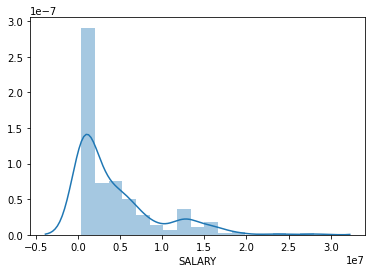

In [23]:
import seaborn as sns
sns.distplot(train['SALARY'])

In [24]:
train.shape, val.shape

((269, 146), (68, 146))

In [25]:
train1 = train[['SALARY',  'Team_Impact_Ratio', 'Team-Contribution-Real', 'Team-Contribution' , 'HR', 'AVG', 'RBI', 'R', 'PA', 'PLAYER', 'Overall_Impact', 
                'Overall_Impact_Ratio', 'A-Rod_Factor']]
train1 = train1[train1['SALARY'] <= 500000]
train1 = train1[train1['SALARY'] > 390000]
print(train1.shape)
train1.head()

(66, 13)


,SALARY,Team_Impact_Ratio,Team-Contribution-Real,Team-Contribution,HR,AVG,RBI,R,PA,PLAYER,Overall_Impact,Overall_Impact_Ratio,A-Rod_Factor
75,461200,0.298013,0.122256,117.836853,8,0.249,37,42,453,Melky Cabrera,124.675481,0.842108,1114
195,405500,0.034043,0.005675,5.469619,1,0.169,14,22,235,Tony Pena,42.741057,0.288690,441
40,406000,0.421613,1.669610,1609.253431,18,0.290,76,93,657,Matt Kemp,247.886265,1.674322,1947
315,480000,0.556619,1.315547,1267.989150,14,0.293,58,102,627,Shane Victorino,219.189882,1.480496,1771
335,400000,0.558875,5.328558,5135.928480,36,0.288,100,96,569,Carlos Quentin,261.895400,1.768946,2069


In [0]:
#0-1 M, 1M-3M, 3M-6M, 6M-8M, 8M-12M, 12M-14M, 14M-17M, 17M

In [27]:
train2 = train[['SALARY',  'Team_Impact_Ratio', 'Team-Contribution-Real', 'Team-Contribution' , 'HR', 'AVG', 'RBI', 'R', 'PA', 'PLAYER',
                'Overall_Impact', 
                'Overall_Impact_Ratio', 'A-Rod_Factor']]
train2 = train2[train2['SALARY'] <= 1000000]
train2 = train2[train2['SALARY'] > 500000]
print(train2.shape)
train2.head()

(28, 13)


,SALARY,Team_Impact_Ratio,Team-Contribution-Real,Team-Contribution,HR,AVG,RBI,R,PA,PLAYER,Overall_Impact,Overall_Impact_Ratio,A-Rod_Factor
208,950000,0.197080,0.017164,16.543092,0,0.287,12,14,137,Mike Redmond,38.571400,0.260527,317
105,600000,0.256303,0.052846,50.935668,2,0.217,15,37,238,Eric Bruntlett,54.671582,0.369274,545
188,650000,0.202198,0.142233,137.091127,6,0.246,37,46,455,Jose Castillo,137.969900,0.931904,1157
228,900000,0.406048,1.455686,1403.062579,25,0.264,71,65,463,Rick Ankiel,196.087300,1.324452,1554
200,750000,0.124260,0.094843,91.414072,6,0.217,35,30,338,Paul Bako,93.172213,0.629322,869


In [28]:
train3 = train[['SALARY', 'Team_Impact_Ratio', 'Team-Contribution-Real', 'Team-Contribution', 'HR', 'AVG', 'RBI', 'R', 'PA', 'PLAYER', 
                'Overall_Impact', 
                'Overall_Impact_Ratio', 'A-Rod_Factor']]
train3 = train3[train3['SALARY'] <= 3000000]
train3 = train3[train3['SALARY'] > 1000000]
print(train3.shape)
train3.head()  

(57, 13)


,SALARY,Team_Impact_Ratio,Team-Contribution-Real,Team-Contribution,HR,AVG,RBI,R,PA,PLAYER,Overall_Impact,Overall_Impact_Ratio,A-Rod_Factor
252,1850000,0.196721,0.000826,0.795874,0,0.173,7,3,61,Scott Hatteberg,13.353400,0.090194,139
297,2400000,0.355438,0.139433,134.392753,2,0.284,28,43,377,Nick Punto,109.989084,0.742910,954
78,2800000,0.271523,0.027495,26.500659,1,0.226,14,31,302,Craig Counsell,62.377618,0.421323,712
66,1275000,0.372881,0.076858,74.079632,8,0.182,21,23,177,Jonny Gomes,56.073500,0.378743,502
277,1750000,0.404658,1.405513,1354.703247,17,0.297,89,80,687,Jose Lopez,261.887714,1.768894,1975


In [29]:
train4 = train[['SALARY', 'Team_Impact_Ratio', 'Team-Contribution-Real', 'Team-Contribution', 'HR', 'AVG', 'RBI', 'R', 'PA' , 'PLAYER', 
                'Overall_Impact', 
                'Overall_Impact_Ratio', 'A-Rod_Factor']]
train4 = train4[train4['SALARY'] <= 6000000]
train4 = train4[train4['SALARY'] > 3000000]
print(train4.shape)
train4.head()  

(50, 13)


,SALARY,Team_Impact_Ratio,Team-Contribution-Real,Team-Contribution,HR,AVG,RBI,R,PA,PLAYER,Overall_Impact,Overall_Impact_Ratio,A-Rod_Factor
155,4925000,0.216518,0.395877,381.565774,15,0.225,55,50,448,Bill Hall,150.573562,1.017034,1279
158,5000000,0.196891,0.016760,16.153794,0,0.243,15,16,193,Paul Lo Duca,46.267800,0.312511,436
13,5000000,0.193277,0.135589,130.687381,7,0.217,32,40,357,Austin Kearns,91.768100,0.619838,890
182,5500000,0.394558,0.078241,75.412523,5,0.220,20,15,147,Nick Johnson,46.990900,0.317395,472
81,3800000,0.345902,0.913543,880.518023,20,0.234,72,73,610,Kevin Millar,196.776500,1.329107,1766


In [30]:
train5 = train[['SALARY', 'Team_Impact_Ratio', 'Team-Contribution-Real', 'Team-Contribution', 'HR', 'AVG', 'RBI', 'R', 'PA' , 'PLAYER', 
                'Overall_Impact', 
                'Overall_Impact_Ratio', 'A-Rod_Factor']]
train5 = train5[train5['SALARY'] <= 8000000]
train5 = train5[train5['SALARY'] > 6000000]
print(train5.shape)
train5.head()  

(23, 13)


,SALARY,Team_Impact_Ratio,Team-Contribution-Real,Team-Contribution,HR,AVG,RBI,R,PA,PLAYER,Overall_Impact,Overall_Impact_Ratio,A-Rod_Factor
250,6650000,0.303030,0.028403,27.376127,1,0.272,22,24,330,Jack Wilson,89.684127,0.605762,758
173,6250000,0.425197,1.265201,1219.463962,25,0.243,70,69,508,Mike Cameron,197.486278,1.333901,1641
222,6200000,0.270270,0.287975,277.564470,11,0.205,51,41,407,Brandon Inge,125.380900,0.846872,1128
7,6250000,0.403900,0.178167,171.726359,3,0.245,28,46,359,Luis Castillo,83.391949,0.563262,881
21,6300000,0.507102,1.250446,1205.241551,9,0.296,57,107,704,Brian Roberts,232.491483,1.570340,1991


In [31]:
train6 = train[['SALARY',  'Team_Impact_Ratio', 'Team-Contribution-Real', 'Team-Contribution', 'PLAYER', 'HR', 'AVG', 'RBI', 'R', 'PA', 'PLAYER', 
                'Overall_Impact', 
                'Overall_Impact_Ratio', 'A-Rod_Factor']]
train6 = train6[train6['SALARY'] <= 11000000]
train6 = train6[train6['SALARY'] > 8000000]
print(train6.shape)
train6.head(15)  

(9, 14)


,SALARY,Team_Impact_Ratio,Team-Contribution-Real,Team-Contribution,PLAYER,HR,AVG,RBI,R,PA,PLAYER,Overall_Impact,Overall_Impact_Ratio,A-Rod_Factor
308,8050000,0.175214,0.048404,46.654381,Travis Hafner,5,0.197,24,21,234,Travis Hafner,61.668700,0.416535,604
35,10000000,0.410000,7.092854,6836.444569,Ryan Howard,48,0.251,146,105,700,Ryan Howard,333.987600,2.255885,2614
246,9000000,0.327004,0.352496,339.752687,Jeff Kent,12,0.280,59,42,474,Jeff Kent,170.179200,1.149458,1338
305,8875000,0.461769,1.007613,971.187487,Randy Winn,10,0.306,64,84,667,Randy Winn,223.386849,1.508844,1851
323,8400000,0.432584,5.229303,5040.261366,Justin Morneau,23,0.300,129,97,712,Justin Morneau,308.090900,2.080969,2375
261,10442030,0.169772,0.119742,115.412847,Jason Varitek,13,0.220,43,37,483,Jason Varitek,136.570800,0.922454,1289
116,9250000,0.283388,0.050632,48.801157,Julio Lugo,1,0.268,22,27,307,Julio Lugo,75.683340,0.511195,738
292,10000000,0.303473,0.567621,547.101346,Edgar Renteria,10,0.270,55,69,547,Edgar Renteria,172.977259,1.168357,1449
106,9500000,0.593900,4.452653,4291.687935,Matt Holliday,25,0.321,88,107,623,Matt Holliday,264.695700,1.787860,2104


In [32]:
train7 = train[['SALARY',  'Team_Impact_Ratio', 'Team-Contribution-Real', 'Team-Contribution' , 'HR', 'AVG', 'RBI', 'R', 'PA', 'PLAYER', 
                'Overall_Impact', 
                'Overall_Impact_Ratio', 'A-Rod_Factor']]
train7 = train7[train7['SALARY'] <= 14000000]
train7 = train7[train7['SALARY'] > 11000000]
print(train7.shape)
train7.head()  

(22, 13)


,SALARY,Team_Impact_Ratio,Team-Contribution-Real,Team-Contribution,HR,AVG,RBI,R,PA,PLAYER,Overall_Impact,Overall_Impact_Ratio,A-Rod_Factor
291,14000000,0.478070,2.345581,2260.787370,19,0.280,64,79,456,J.D. Drew,178.593900,1.206294,1553
124,12500000,0.388889,1.120045,1079.554825,17,0.274,73,58,468,Mike Lowell,186.281300,1.258218,1465
311,12500000,0.598753,2.794217,2693.205338,28,0.314,100,61,481,Carlos Lee,243.694800,1.646012,1776
226,14000000,0.516899,1.920534,1851.105924,29,0.280,75,76,503,Alfonso Soriano,221.287300,1.494662,1725
179,13000000,0.480652,2.896198,2791.499032,23,0.264,89,74,491,David Ortiz,210.089026,1.419025,1716


In [33]:
train8 = train[['SALARY', 'Team_Impact_Ratio', 'Team-Contribution-Real', 'Team-Contribution', 'HR', 'AVG', 'RBI', 'R', 'PA' , 'PLAYER', 
                'Overall_Impact', 
                'Overall_Impact_Ratio', 'A-Rod_Factor']]
train8 = train8[train8['SALARY'] > 14000000]
train8 = train8[train8['SALARY'] <= 17000000]
print(train8.shape)
train8.head(15)  

(9, 13)


,SALARY,Team_Impact_Ratio,Team-Contribution-Real,Team-Contribution,HR,AVG,RBI,R,PA,PLAYER,Overall_Impact,Overall_Impact_Ratio,A-Rod_Factor
224,16500000,0.430921,1.711131,1649.272703,21,0.278,78,85,608,Torii Hunter,234.5840,1.584474,1868
206,15500000,0.451667,2.682722,2585.740670,27,0.303,91,85,600,Vladimir Guerrero,261.1888,1.764173,2007
296,16000000,0.476608,3.435737,3311.533439,20,0.296,100,100,684,Bobby Abreu,270.9870,1.830354,2164
199,15730195,0.689024,0.252579,243.448413,5,0.357,16,34,164,Rafael Furcal,68.7050,0.464061,543
157,15500000,0.223242,0.126614,122.036660,12,0.221,36,29,327,Richie Sexson,100.1777,0.676640,945
211,15000000,0.462016,4.745996,4574.426463,27,0.289,111,97,645,Aramis Ramirez,278.6900,1.882383,2196
57,16000000,0.444606,4.097677,3949.544826,38,0.271,115,96,686,Carlos Delgado,297.5900,2.010041,2367
301,16600000,0.332410,0.157669,151.969590,7,0.264,29,39,361,Todd Helton,101.5825,0.686129,1014
132,15768174,0.388443,2.356130,2270.955103,21,0.317,103,72,623,Magglio Ordonez,266.0888,1.797270,2027


In [34]:
train9 = train[['SALARY', 'Team_Impact_Ratio', 'Team-Contribution-Real', 'Team-Contribution' , 'HR', 'AVG', 'RBI', 'R', 'PA', 'PLAYER',
                'Overall_Impact', 
                'Overall_Impact_Ratio', 'A-Rod_Factor']]
train9 = train9[train9['SALARY'] > 17000000]
print(train9.shape)
train9.head(15) 

(5, 13)


,SALARY,Team_Impact_Ratio,Team-Contribution-Real,Team-Contribution,HR,AVG,RBI,R,PA,PLAYER,Overall_Impact,Overall_Impact_Ratio,A-Rod_Factor
23,18929923,0.525994,7.847534,7563.843125,37,0.332,121,102,654,Manny Ramirez,317.202900,2.142515,2459
181,23428571,0.447788,2.224223,2143.816911,32,0.247,96,68,565,Jason Giambi,228.289700,1.541959,1931
130,18622809,0.560907,5.916354,5702.475588,27,0.284,112,116,706,Carlos Beltran,290.594292,1.962790,2362
257,17102149,0.477971,0.507332,488.991981,6,0.311,42,103,749,Ichiro Suzuki,214.987404,1.452110,1853
259,28000000,0.558923,6.113649,5892.638333,35,0.302,103,104,594,Alex Rodriguez,276.596300,1.868241,2149


In [35]:
train10 = train9.copy()
train10.head()

data = {'SALARY': [18929923 , 23428571, 18622809 , 17102149 , 28000000 ], 
        'Team_Impact_Ratio': [0.525994, 0.447788, 0.560907, 0.477971 	, 0.558923 ], 
        'Team-Contribution-Real': [7.847534 	, 2.224223 	, 5.916354 	, 0.507332 	, 6.113649 	],
        'Team-Contribution': [7563.843125, 2143.816911, 5702.475588, 488.991981, 5892.638333],
        'HR': [37, 32, 27, 6, 35],
        'RBI': [121, 96, 112, 42, 103],
        'Overall_Impact': [317.202900, 228.289700, 290.594292, 214.987404,  276.596300],
        'A-Rod_Factor': [2459, 1931, 2362, 1853, 2149]}

train10 = pd.DataFrame(data, index = ['23', '181', '130', '257', '259'])
train10 = train10.drop(['257'])
train10.head()

,SALARY,Team_Impact_Ratio,Team-Contribution-Real,Team-Contribution,HR,RBI,Overall_Impact,A-Rod_Factor
23,18929923,0.525994,7.847534,7563.843125,37,121,317.202900,2459
181,23428571,0.447788,2.224223,2143.816911,32,96,228.289700,1931
130,18622809,0.560907,5.916354,5702.475588,27,112,290.594292,2362
259,28000000,0.558923,6.113649,5892.638333,35,103,276.596300,2149


In [36]:
train['SALARY'].max()

28000000

In [37]:

train1, val1 = train_test_split(train1, train_size=0.80, test_size=0.20, 
                              random_state=25)

train1.shape, val1.shape

((52, 13), (14, 13))

In [0]:
features = [ 'Team-Contribution']
target = ['SALARY']
X_train = train1[features]
y_train = train1[target]
X_val = val1[features]
y_val = val1[target]

In [39]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae1 = mean_absolute_error(y_val, y_pred)
mae1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


13885.5

In [40]:

train2, val2 = train_test_split(train2, train_size=0.80, test_size=0.20, 
                              random_state=25)

train2.shape, val2.shape

((22, 13), (6, 13))

In [0]:
features = [ 'Team-Contribution']
target = ['SALARY']
X_train = train2[features]
y_train = train2[target]
X_val = val2[features]
y_val = val2[target]

In [42]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae2 = mean_absolute_error(y_val, y_pred)
mae2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


112558.33333333333

In [43]:

train3, val3 = train_test_split(train3, train_size=0.80, test_size=0.20, 
                              random_state=25)

train3.shape, val3.shape

((45, 13), (12, 13))

In [0]:
features = [ 'Team-Contribution']
target = ['SALARY']
X_train = train3[features]
y_train = train3[target]
X_val = val3[features]
y_val = val3[target]

In [45]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae3 = mean_absolute_error(y_val, y_pred)
mae3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


565891.6666666666

In [46]:

train4, val4 = train_test_split(train4, train_size=0.80, test_size=0.20, 
                              random_state=25)

train4.shape, val4.shape

((40, 13), (10, 13))

In [0]:
features = [ 'Team-Contribution']
target = ['SALARY']
X_train = train4[features]
y_train = train4[target]
X_val = val4[features]
y_val = val4[target]

In [48]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae4 = mean_absolute_error(y_val, y_pred)
mae4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


826570.7980000001

In [49]:

train5, val5 = train_test_split(train5, train_size=0.80, test_size=0.20, 
                              random_state=25)

train5.shape, val5.shape

((18, 13), (5, 13))

In [0]:
features = [ 'Team-Contribution']
target = ['SALARY']
X_train = train5[features]
y_train = train5[target]
X_val = val5[features]
y_val = val5[target]

In [51]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae5 = mean_absolute_error(y_val, y_pred)
mae5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


616359.2279999999

In [52]:

train6, val6 = train_test_split(train6, train_size=0.80, test_size=0.20, 
                              random_state=25)

train6.shape, val6.shape

((7, 14), (2, 14))

In [0]:
features = [ 'Team-Contribution']
target = ['SALARY']
X_train = train6[features]
y_train = train6[target]
X_val = val6[features]
y_val = val6[target]

In [54]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae6 = mean_absolute_error(y_val, y_pred)
mae6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1162264.6499999994

In [55]:

train7, val7 = train_test_split(train7, train_size=0.80, test_size=0.20, 
                              random_state=25)

train7.shape, val7.shape

((17, 13), (5, 13))

In [0]:
features = ['Team-Contribution']
target = ['SALARY']
X_train = train7[features]
y_train = train7[target]
X_val = val7[features]
y_val = val7[target]

In [57]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae7 = mean_absolute_error(y_val, y_pred)
mae7

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


398518.17600000015

In [58]:

train8, val8 = train_test_split(train8, train_size=0.80, test_size=0.20, 
                              random_state=25)

train8.shape, val8.shape

((7, 13), (2, 13))

In [0]:
features = [ 'Team-Contribution']
target = ['SALARY']
X_train = train8[features]
y_train = train8[target]
X_val = val8[features]
y_val = val8[target]

In [60]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae8 = mean_absolute_error(y_val, y_pred)
mae8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


612313.7799999993

In [61]:

train9, val9 = train_test_split(train10, train_size=0.80, test_size=0.20, 
                              random_state=25)

train9.shape, val9.shape

((3, 8), (1, 8))

In [0]:
features = [ 'Team-Contribution']
target = ['SALARY']
X_train = train10[features]
y_train = train10[target]
X_val = val9[features]
y_val = val9[target]

In [63]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae9 = mean_absolute_error(y_val, y_pred)
mae9

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1304585.7300000004

In [0]:
# Now that we have all the different errors within different salary ranges, 
#we can find the error/mean of salary range within specific group, to find overall error

In [0]:
# Ranges, #0-1 M, 1M-3M, 3M-6M, 6M-8M, 8M-12M, 12M-14M, 14M-17M, 17M

In [0]:
s1 = 445000

In [0]:
s2 = 750000

In [0]:
s3 = 2000000

In [0]:
s4 = 4500000

In [0]:
s5 = 7000000

In [0]:
s6 = 9500000

In [0]:
s7 = 12500000

In [0]:
s8 = 15500000

In [0]:
s9 = 22500000

In [75]:
print(mae1/s1)
print(mae2/s2)
print(mae3/s3)
print(mae4/s4)
print(mae5/s5)
print(mae6/s6)
print(mae7/s7)
print(mae8/s8)
mae9/s9

0.031203370786516853
0.15007777777777778
0.28294583333333334
0.18368239955555557
0.08805131828571428
0.12234364736842099
0.03188145408000001
0.039504114838709636


0.05798158800000002

In [0]:
# 

In [0]:
#What this shows, essentially, low salary players are not being compensated based on value metrics
# But as you get above the 3M salary mark, players are being more fairly compensated based on their performance, 
# And essentially it is the majority of lower paid players who are skewing the error


In [0]:
# Baseline beaten again with different created variable
    #Random Forest Regressor 


In [77]:
features = ['Team-Contribution-Real']
target = ['SALARY']
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

model = RandomForestRegressor(n_estimators= 101, criterion='mae', min_samples_split=6,
                              min_impurity_decrease=.02)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mae

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


3357310.2203698303

In [0]:
#'PA', 'AB', 'H', '1B', '2B', '3B', 'HR', 'TB', 'BB',

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91841ffc88>]],
      dtype=object)

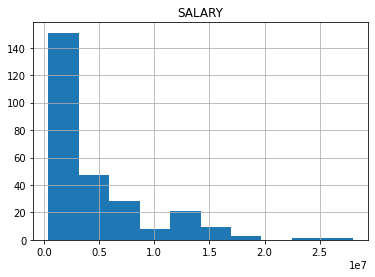

In [79]:
train.hist(column='SALARY')

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

986.9438867895034


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9184116898>]],
      dtype=object)

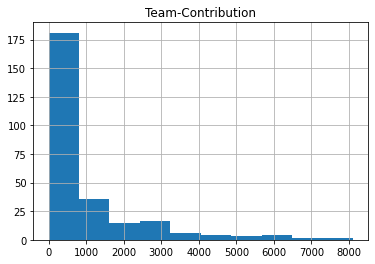

In [81]:
print(train['Team-Contribution'].mean())
train.hist(column='Team-Contribution')

In [82]:

print(train1['RBI'].mean())
print(train2['RBI'].mean())
print(train3['RBI'].mean())
print(train4['RBI'].mean())
print(train5['RBI'].mean())
print(train6['RBI'].mean())
print(train7['RBI'].mean())
print(train8['RBI'].mean())
train9['RBI'].mean()


48.75
31.636363636363637
38.4
48.75
57.333333333333336
77.42857142857143
73.41176470588235
83.57142857142857


112.0

In [106]:
print(train1['R'].mean())
print(train2['R'].mean())
print(train3['R'].mean())
print(train4['R'].mean())
print(train5['R'].mean())
print(train6['R'].mean())
print(train7['R'].mean())
print(train8['R'].mean())


55.03846153846154
36.63636363636363
41.93333333333333
50.3
60.27777777777778
69.14285714285714
63.1764705882353
74.0


In [108]:

print(train1['Overall_Impact'].mean())
print(train2['Overall_Impact'].mean())
print(train3['Overall_Impact'].mean())
print(train4['Overall_Impact'].mean())
print(train5['Overall_Impact'].mean())
print(train6['Overall_Impact'].mean())
print(train7['Overall_Impact'].mean())
print(train8['Overall_Impact'].mean())
train9['Overall_Impact'].mean()

148.88447691296034
96.01145524255823
115.1901915241421
143.73857219317958
169.6802573368173
208.88354282941003
199.00928168515293
225.18639999999996


294.79783066666664

In [87]:

print(train1['Team-Contribution'].mean())
print(train2['Team-Contribution'].mean())
print(train3['Team-Contribution'].mean())
print(train4['Team-Contribution'].mean())
print(train5['Team-Contribution'].mean())
print(train6['Team-Contribution'].mean())
print(train7['Team-Contribution'].mean())
print(train8['Team-Contribution'].mean())
print(train9['Team-Contribution'].mean())



1000.2214693815397
397.493995472851
492.0536722669463
774.7601252840052
1111.0169214104726
2459.923129469524
1921.0325706287736
2423.743821682837
6386.3190153333335


In [88]:
print(train1['Team-Contribution-Real'].mean())
print(train2['Team-Contribution-Real'].mean())
print(train3['Team-Contribution-Real'].mean())
print(train4['Team-Contribution-Real'].mean())
print(train5['Team-Contribution-Real'].mean())
print(train6['Team-Contribution-Real'].mean())
print(train7['Team-Contribution-Real'].mean())
print(train8['Team-Contribution-Real'].mean())
print(train9['Team-Contribution-Real'].mean())

1.0377360174145547
0.41240250128129124
0.5105087561540113
0.8038184656853593
1.152686990429804
2.5521856005551213
1.9930832822460707
2.5146493429115147
6.625845666666667


In [0]:
# the 390k-500k players are basically performing as well on average as players making 10+ times their salary...
# underperforming sectors, overperforming sectors, 
#make chart of above data
# Both A-Rod factor and Team Contribution have beaten the baseline...
# Both Linear Regression and Random Forest Regressor were successful...now what?




In [89]:
features = ['AVG', 'HR', 'R', 'RBI', 'PA']
target = ['SALARY']
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

model = RandomForestRegressor(n_estimators= 101, criterion='mae', min_samples_split=6,
                              min_impurity_decrease=.02)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mae

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


3916987.6450203843

In [0]:
#Random Forest Regressor barely beats baseline with basic batting statistics

In [91]:
features = [ 'AVG', 'R', 'PA', 'HR', 'RBI' ]
target = ['SALARY']
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mae

3999015.704330033

In [0]:
#Linear Regression loses to baseline with basic batting statistics

In [93]:
features = ['Team-Contribution']
target = ['SALARY']
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

model = RandomForestRegressor(n_estimators= 101, criterion='mae', min_samples_split=6,
                              min_impurity_decrease=.02)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mae

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


3323511.4923558533

In [0]:
#Random Forest Regressor most successful with Team Contribution feature

In [95]:
features = ['A-Rod_Factor']
target = ['SALARY']
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mae

3570808.433712526

In [0]:
#Linear Regression Most Successful with A-Rod_Factor

In [97]:
print(df['Team-Contribution'].mean())
df['SALARY'].mean()

963.8496232148908


4349423.148367953

In [0]:
#How to assess value of a player? Salary should reflect overall contribution based on Team Contribution...
#so a player should be paid 4349423.148367953 for every 963.8496232148908 Team Contribution...but are they?

#The average Team Contribution in the 390k-500k range is 1000, and yet they are compensated on average about 1/10th of the average salary...
#This comes to pass because a lot of the lower paid players in this range are either on their first contract, or completely overperforming
#We can use Team Contribution as a relatively accurate measurement of ability, but we can not predict year to year salary ranges because...
#Player performance varies from year to year, for many players, and this inconsistency is what makes value harder to predict in a one year 
#Data-Table. However, we can use things such as the Team Contribution on much larger datatables, to get a more accurate reflection of a players value
#And over the years, a player's Team Contribution should move somewhat close to his numbers on the field, as his salary is adjusted based on a constant 
#re-evaluation. 
#The MAIN takeaway from this 2008 dataset, is that the 390k-500k players are performing equivalent or better than the 3-6 million dollar players in just 
#about every offensive category, RBI, HR, AVG, Runs scored, and subsequently, Team Contribution, which is essentially my way of weighting
# those variables and a few more, and summing all of them up. 
# As the 390k-500k group comprises about 1/5th of the entire players in the training set, and val set, I did not feel that they should be removed.
# And so I come to the conclusion of my findings. The real value creation in a team will most likely come from the free agent market, 
# the farm league system, and the discounted players. For many of these players, they are still highly skilled athletes, but have been
#compromised for whatever reason, and are being taken advantage of. Their salaries are not fair, relative to what the majority of MLB players make
# and so evaluating talent at this level, is where championships can be won.



In [0]:
#Why is the lowest salary range, with larger sample sizing than other ranges, performing on average statistically above the 3-6 million dollar range?


In [98]:
train1.head(55)

,SALARY,Team_Impact_Ratio,Team-Contribution-Real,Team-Contribution,HR,AVG,RBI,R,PA,PLAYER,Overall_Impact,Overall_Impact_Ratio,A-Rod_Factor
142,402500,0.326693,0.161713,155.866555,3,0.266,43,45,502,Jeff Keppinger,141.478867,0.955605,1213
304,400000,0.061728,0.011062,10.662296,3,0.225,15,11,162,Kevin Cash,44.169300,0.298337,420
108,400500,0.289855,0.055616,53.605922,5,0.255,18,24,207,Miguel Montero,68.681082,0.463899,583
112,406000,0.533662,0.755243,727.941115,9,0.280,47,98,609,Jacoby Ellsbury,185.583498,1.253505,1572
190,400000,0.093960,0.009249,8.914234,2,0.187,14,12,149,Guillermo Quiroz,35.061098,0.236817,345
136,430000,0.400651,1.373439,1323.788871,12,0.287,69,86,614,Kelly Johnson,219.194861,1.480529,1769
278,404100,0.287841,1.282397,1236.038254,21,0.261,55,67,403,Kelly Shoppach,165.993711,1.121188,1327
192,415000,0.365333,0.353462,340.684203,3,0.277,39,53,375,Erick Aybar,120.491200,0.813846,948
139,405000,0.365385,0.693602,668.527722,15,0.254,51,54,416,Josh Willingham,151.288983,1.021866,1283
275,500000,0.400000,2.211112,2131.179208,29,0.277,95,92,685,Jorge Cantu,277.983400,1.877611,2141


In [0]:
# 16 of the high performing players in this salary range were on their 1st contract,
# 5 of the high performing players in this salary range were barely on their 2nd contract
# the other 3 high performing players in this salary range had 2008 as one of their peak performing years statistically


In [0]:
####



#Graph1: Comparing Lowest salary range to salary range 4, based on performance

In [158]:
print(train1['SALARY'].mean())
print(train1['RBI'].mean())
print(train1['HR'].mean())
print(train1['Team-Contribution'].mean())
print(train1['A-Rod_Factor'].mean())

418813.46153846156
48.75
12.134615384615385
1000.2214693815397
1222.2884615384614


In [159]:
print(train4['SALARY'].mean())
print(train4['RBI'].mean())
print(train4['HR'].mean())
print(train4['Team-Contribution'].mean())
print(train4['A-Rod_Factor'].mean())

4467166.625
48.75
11.325
774.7601252840052
1202.875


In [0]:
import plotly.express as px

In [165]:
data = {'SALARY_Mean': [418813.46153846156 , 4467166.625], 
        'RBI_Mean': [48.75, 48.75], 
        'HR_Mean': [12.134615384615385 	, 11.325],
        'Team-Contribution_Mean': [1000.2214693815397, 774.7601252840052],
        'A_Rod_Factor_Mean': [1222.2884615384614, 1202.875]}

train15 = pd.DataFrame(data, index = ['Low Salary', '10XLow Salary'])
train15.head()

,SALARY_Mean,RBI_Mean,HR_Mean,Team-Contribution_Mean,A_Rod_Factor_Mean
Low Salary,4.188135e+05,48.75,12.134615,1000.221469,1222.288462
10XLow Salary,4.467167e+06,48.75,11.325000,774.760125,1202.875000


In [0]:
#######


# Graph 2, Compare different salary ranges to implied performance in HR, RBI, Team Contribution, A-Rod Factor, and Overall Impact 

In [109]:
print(train1['SALARY'].mean())
print(train2['SALARY'].mean())
print(train3['SALARY'].mean())
print(train4['SALARY'].mean())
print(train5['SALARY'].mean())
print(train6['SALARY'].mean())
print(train7['SALARY'].mean())
print(train8['SALARY'].mean())
train9['SALARY'].mean()

418813.46153846156
819318.1818181818
1932133.3333333333
4467166.625
6995146.0
9513147.142857144
12694544.411764706
15766882.0


21850910.666666668

In [144]:
print(df.loc[:,"SALARY"].std())
print(df.loc[:,"RBI"].std())
print(df.loc[:,"HR"].std())
print(df.loc[:,"Team-Contribution"].std())
df.loc[:,"A-Rod_Factor"].std()

4910061.413772842
30.835266447961395
10.270893675260792
1443.2378675200953


648.1729463908162

In [145]:
print(df['SALARY'].mean())
print(df['HR'].mean())
print(df['RBI'].mean())
print(df['Team-Contribution'].mean())
print(df['A-Rod_Factor'].mean())


4349423.148367953
11.750741839762611
50.32047477744807
963.8496232148908
1227.1839762611276


In [146]:
HR_per_dollar =(df['HR'].mean() /df['SALARY'].mean())
RBI_per_dollar = (df['RBI'].mean() /df['SALARY'].mean())
TeamCont_per_dollar = (df['Team-Contribution'].mean() / df['SALARY'].mean())
ARod_per_dollar = (df['A-Rod_Factor'].mean() / df['SALARY'].mean())


print(HR_per_dollar)
print(RBI_per_dollar)
print(TeamCont_per_dollar)
print(ARod_per_dollar)


2.7016782315539657e-06
1.1569459457245491e-05
0.00022160401283939437
0.00028214867452517413


In [0]:
# These ratios represent for each dollar in salary, what the performance should be in various categories
# Now, We can find if and how much a specific salary range overperformed or underperformed in these areas


In [147]:
print(train1['SALARY'].mean() * HR_per_dollar)
print(train1['SALARY'].mean() * RBI_per_dollar)
print(train1['SALARY'].mean() * TeamCont_per_dollar)
print(train1['SALARY'].mean() * ARod_per_dollar)



1.1314992121202256
4.845445363417875
92.81074370808044
118.16766304637693


In [148]:
print(train1['HR'].mean())
print(train1['RBI'].mean())
print(train1['Team-Contribution'].mean())
print(train1['A-Rod_Factor'].mean())



12.134615384615385
48.75
1000.2214693815397
1222.2884615384614


In [0]:
##### Data for graph 2

In [168]:
data = {'HR_Performance': [10.724369274528527 , 3.100759267445607, 1.4303952097052228, 0.9383663710278615,
                           0.6731821168228469, 0.7336992134544228, 0.584863763822233, 0.5097604142566489,
                           0.558998670337645], 
        'RBI_Performance': [10.060994675134006, 3.337497105260791, 1.7178334801575033, 0.9432556159493833,
                            0.7084306463959162, 0.7034997765520059, 0.49984514266756375, 0.45814076870525045,
                            0.4430323227584592], 
        'Team-Contribution_Performance': [10.777000909803688, 2.1892752111727725, 1.1492056801432546, 0.78263179666765,
                                          0.7167146302590363, 1.1668625496159326, 0.682873073916102, 0.6936865552800868,
                                          1.318874426287654],
        'A_Rod_Factor_Performance': [10.343679734605171, 3.597910331410708, 1.7639218795275542, 0.9543558335300286,
                                     0.7083528276555381, 0.6337268166922276, 0.45129120412829943, 0.40847477248956254,
                                     0.37684605001471483],
        }

train20 = pd.DataFrame(data, index = ['Salary1', 'Salary2', 'Salary3', 'Salary4',
                                      'Salary5', 'Salary6', 'Salary7', 'Salary8',
                                      'Salary9'])
train20.head(9)

,HR_Performance,RBI_Performance,Team-Contribution_Performance,A_Rod_Factor_Performance
Salary1,10.724369,10.060995,10.777001,10.343680
Salary2,3.100759,3.337497,2.189275,3.597910
Salary3,1.430395,1.717833,1.149206,1.763922
Salary4,0.938366,0.943256,0.782632,0.954356
Salary5,0.673182,0.708431,0.716715,0.708353
Salary6,0.733699,0.703500,1.166863,0.633727
Salary7,0.584864,0.499845,0.682873,0.451291
Salary8,0.509760,0.458141,0.693687,0.408475
Salary9,0.558999,0.443032,1.318874,0.376846


In [0]:
# Graph 2 info below

In [149]:
print(train1['HR'].mean()/ (train1['SALARY'].mean() * HR_per_dollar))
print(train1['RBI'].mean()/ (train1['SALARY'].mean() * RBI_per_dollar))
print(train1['Team-Contribution'].mean()/ (train1['SALARY'].mean() * TeamCont_per_dollar))
print(train1['A-Rod_Factor'].mean()/ (train1['SALARY'].mean() * ARod_per_dollar))



10.724369274528527
10.060994675134006
10.777000909803688
10.343679734605171


In [150]:
print(train2['HR'].mean()/ (train2['SALARY'].mean() * HR_per_dollar))
print(train2['RBI'].mean()/ (train2['SALARY'].mean() * RBI_per_dollar))
print(train2['Team-Contribution'].mean()/ (train2['SALARY'].mean() * TeamCont_per_dollar))
print(train2['A-Rod_Factor'].mean()/ (train2['SALARY'].mean() * ARod_per_dollar))


3.100759267445607
3.337497105260791
2.1892752111727725
3.597910331410708


In [151]:
print(train3['HR'].mean()/ (train3['SALARY'].mean() * HR_per_dollar))
print(train3['RBI'].mean()/ (train3['SALARY'].mean() * RBI_per_dollar))
print(train3['Team-Contribution'].mean()/ (train3['SALARY'].mean() * TeamCont_per_dollar))
print(train3['A-Rod_Factor'].mean()/ (train3['SALARY'].mean() * ARod_per_dollar))


1.4303952097052228
1.7178334801575033
1.1492056801432546
1.7639218795275542


In [152]:
print(train4['HR'].mean()/ (train4['SALARY'].mean() * HR_per_dollar))
print(train4['RBI'].mean()/ (train4['SALARY'].mean() * RBI_per_dollar))
print(train4['Team-Contribution'].mean()/ (train4['SALARY'].mean() * TeamCont_per_dollar))
print(train4['A-Rod_Factor'].mean()/ (train4['SALARY'].mean() * ARod_per_dollar))


0.9383663710278615
0.9432556159493833
0.78263179666765
0.9543558335300286


In [153]:
print(train5['HR'].mean()/ (train5['SALARY'].mean() * HR_per_dollar))
print(train5['RBI'].mean()/ (train5['SALARY'].mean() * RBI_per_dollar))
print(train5['Team-Contribution'].mean()/ (train5['SALARY'].mean() * TeamCont_per_dollar))
print(train5['A-Rod_Factor'].mean()/ (train5['SALARY'].mean() * ARod_per_dollar))


0.6731821168228469
0.7084306463959162
0.7167146302590363
0.7083528276555381


In [154]:
print(train6['HR'].mean()/ (train6['SALARY'].mean() * HR_per_dollar))
print(train6['RBI'].mean()/ (train6['SALARY'].mean() * RBI_per_dollar))
print(train6['Team-Contribution'].mean()/ (train6['SALARY'].mean() * TeamCont_per_dollar))
print(train6['A-Rod_Factor'].mean()/ (train6['SALARY'].mean() * ARod_per_dollar))


0.7336992134544228
0.7034997765520059
1.1668625496159326
0.6337268166922276


In [155]:
print(train7['HR'].mean()/ (train7['SALARY'].mean() * HR_per_dollar))
print(train7['RBI'].mean()/ (train7['SALARY'].mean() * RBI_per_dollar))
print(train7['Team-Contribution'].mean()/ (train7['SALARY'].mean() * TeamCont_per_dollar))
print(train7['A-Rod_Factor'].mean()/ (train7['SALARY'].mean() * ARod_per_dollar))


0.584863763822233
0.49984514266756375
0.682873073916102
0.45129120412829943


In [156]:
print(train8['HR'].mean()/ (train8['SALARY'].mean() * HR_per_dollar))
print(train8['RBI'].mean()/ (train8['SALARY'].mean() * RBI_per_dollar))
print(train8['Team-Contribution'].mean()/ (train8['SALARY'].mean() * TeamCont_per_dollar))
print(train8['A-Rod_Factor'].mean()/ (train8['SALARY'].mean() * ARod_per_dollar))


0.5097604142566489
0.45814076870525045
0.6936865552800868
0.40847477248956254


In [157]:
print(train9['HR'].mean()/ (train9['SALARY'].mean() * HR_per_dollar))
print(train9['RBI'].mean()/ (train9['SALARY'].mean() * RBI_per_dollar))
print(train9['Team-Contribution'].mean()/ (train9['SALARY'].mean() * TeamCont_per_dollar))
print(train9['A-Rod_Factor'].mean()/ (train9['SALARY'].mean() * ARod_per_dollar))


0.558998670337645
0.4430323227584592
1.318874426287654
0.37684605001471483


In [0]:
# As seen above, the first 4 groups overperform for their value, and the last 5 underperform by more and more as the Salary ranges go up

In [0]:
data = {'SALARY_Mean': [418813.46153846156 , 4467166.625], 
        'RBI_Mean': [48.75, 48.75], 
        'HR_Mean': [12.134615384615385 	, 11.325],
        'Team-Contribution_Mean': [1000.2214693815397, 774.7601252840052],
        'A_Rod_Factor_Mean': [1222.2884615384614, 1202.875]}

train15 = pd.DataFrame(data, index = ['Low Salary', '10XLow Salary'])
train15.head()

In [138]:
#3rd Graph, 

features = ['A-Rod_Factor']
target = ['SALARY']
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mae

3570808.433712526

In [139]:
features = ['Team-Contribution']
target = ['SALARY']
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

model = RandomForestRegressor(n_estimators= 101, criterion='mae', min_samples_split=6,
                              min_impurity_decrease=.02)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mae

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


3315136.2047903324

In [140]:
features = ['HR', 'RBI', 'PA', 'AVG', 'R']
target = ['SALARY']
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

model = RandomForestRegressor(n_estimators= 101, criterion='mae', min_samples_split=6,
                              min_impurity_decrease=.02)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mae

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


3876401.0714909732

In [141]:
features = ['HR', 'RBI', 'PA', 'AVG', 'R']
target = ['SALARY']
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mae

3999015.704330033

In [0]:
####### Graph 3

# Graph 2 Linear models and their corresponding errors, and 2 RandomForestRegressors and their corresponding errors

Linear_1 = 3999015.704330033
Linear_2 = 3570808.433712526
Random_1 = 3876401.0714909732
Random_2 = 3315136.2047903324